## Install modules

In [1]:
!pip3 install ipympl plotly PyGAD

## Define function

In [2]:
import pygad
import numpy as np
from numpy import *
import plotly.graph_objects as go

def schwefel(x1, x2):  
    return 418.9829*2 - x1 * sin(sqrt(abs(x1))) - x2 * sin(sqrt(abs(x2)))

def fitness_function(solution, solution_idx):
	x1, x2 = solution
	return -schwefel(x1, x2)

In [3]:
x1 = np.linspace(-512, 512)
x2 = np.linspace(-512, 512)
x1, x2 = np.meshgrid(x1, x2)
y = schwefel(x1, x2)

fig = go.Figure(data=[go.Surface(z=y, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Schwefel Function', autosize=False,
                  width=700, height=500)
fig.show()

## Define GE params

In [4]:
num_generations = 100
num_parents_mating = 10
sol_per_pop = 30
num_genes = 2

last_fitness = 0
ga_x1, ga_x2, ga_gn = [], [], []
gabs_x1, gabs_x2, gabs_gn = [], [], []
def callback_generation(ga_instance):
    global last_fitness
    if ga_instance.generations_completed % 10:
      for s_x1, s_x2 in ga_instance.solutions:
          ga_x1.append(s_x1)
          ga_x2.append(s_x2)
          ga_gn.append(ga_instance.generations_completed)
    (bs_x1, bs_x2), bs_f, _ = ga_instance.best_solution()
    gabs_x1.append(bs_x1)
    gabs_x2.append(bs_x2)
    gabs_gn.append(ga_instance.generations_completed)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Chromosome = {x1}, {x2}".format(x1=bs_x1, x2=bs_x2))
    print("Fitness    = {fitness}".format(fitness=-bs_f))
    print("Change     = {change}".format(change=bs_f - last_fitness))
    last_fitness = bs_f

## Run evolution

In [5]:
ga_instance = pygad.GA(init_range_high=500,
                       init_range_low=-500,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation,
                       save_solutions=True,
                       random_mutation_min_val=-20,
                       random_mutation_max_val=20)

ga_instance.run()

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:469: UserWarning:

The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:795: UserWarning:

Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.



Generation = 1
Chromosome = 409.8730840243631, -319.03038677813925
Fitness    = 167.96440101682595
Change     = -167.96440101682595
Generation = 2
Chromosome = 427.45165278242183, -305.3388642957514
Fitness    = 124.74740872744917
Change     = 43.216992289376776
Generation = 3
Chromosome = 409.8730840243631, 402.0664694868275
Fitness    = 59.31702851284416
Change     = 65.43038021460501
Generation = 4
Chromosome = 409.8730840243631, 410.08556454946
Fitness    = 30.16587021790849
Change     = 29.15115829493567
Generation = 5
Chromosome = 409.8730840243631, 419.18602082090246
Fitness    = 15.772816755146778
Change     = 14.393053462761713
Generation = 6
Chromosome = 409.8730840243631, 419.18602082090246
Fitness    = 15.772816755146778
Change     = 0.0
Generation = 7
Chromosome = 422.9264014846195, 419.18602082090246
Fitness    = 0.8845700360078013
Change     = 14.888246719138976
Generation = 8
Chromosome = 422.9264014846195, 419.18602082090246
Fitness    = 0.8845700360078013
Change     =

## Graphs

In [6]:
fig = go.Figure(data=
    go.Contour(
        z=y.flatten(), x=x1.flatten(), y=x2.flatten(),
        contours_coloring='heatmap',
        line_width=2,
        line_smoothing=0.85
    )
)
# fig.add_trace(go.Scatter(x=ga_x1, y=ga_x2, mode='markers', showlegend=True,
#                         marker=dict(size=12, color=ga_gn, colorscale='greens')))
fig.add_trace(go.Scatter(x=gabs_x1, y=gabs_x2, mode='markers',
                        marker=dict(size=12, color=gabs_gn, colorscale='greens'),
                        line=dict(width=12, color='green')))
fig.update_layout(title='Schwefel Function Contour', autosize=False,
                  width=700, height=700)

fig.show()

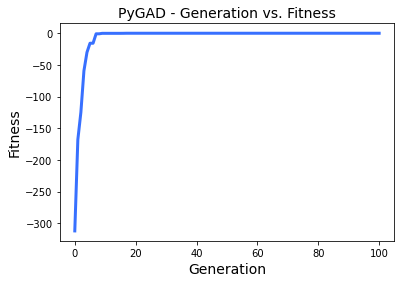

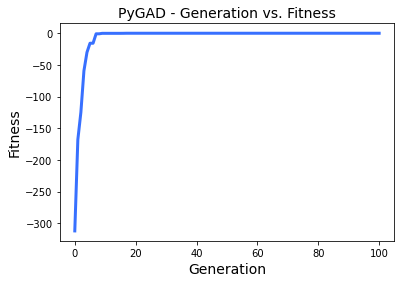

In [7]:
ga_instance.plot_fitness()

## Result

In [8]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=-solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance
filename = 'genetic'
ga_instance.save(filename=filename)

Parameters of the best solution : [420.8928794  420.89195824]
Fitness value of the best solution = 0.0014957285249010965
Index of the best solution : 0
Best fitness value reached after 72 generations.
